In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [2]:
data_dir = './data/GTSRB'
train_data_dir = './data/GTSRB/Train'

# Resizing image into 30x30x3
Image_height = 30
Image_width = 30
channels = 3

In [3]:
num_categories = len(os.listdir(train_data_dir))
num_categories

43

In [4]:
classes = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
}

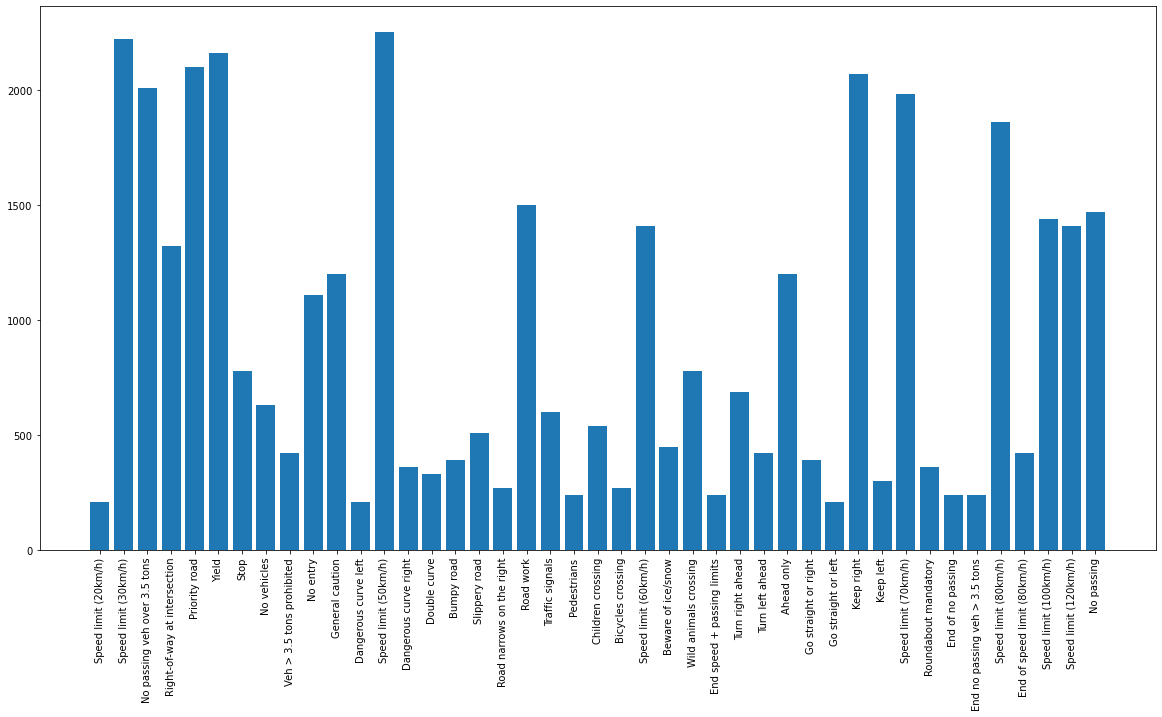

In [5]:
# Dataset visualization
dirs = os.listdir(train_data_dir)

train_num = [] # How many image contains in each class
class_num = [] # Number of classes

for dir in dirs:
    train_files = os.listdir(train_data_dir + '/'+dir)
    train_num.append(len(train_files))
    class_num.append(classes[int(dir)])

#print(class_num)

# Ploting the num of images in each class
plt.figure(figsize=(20, 10))
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.show()

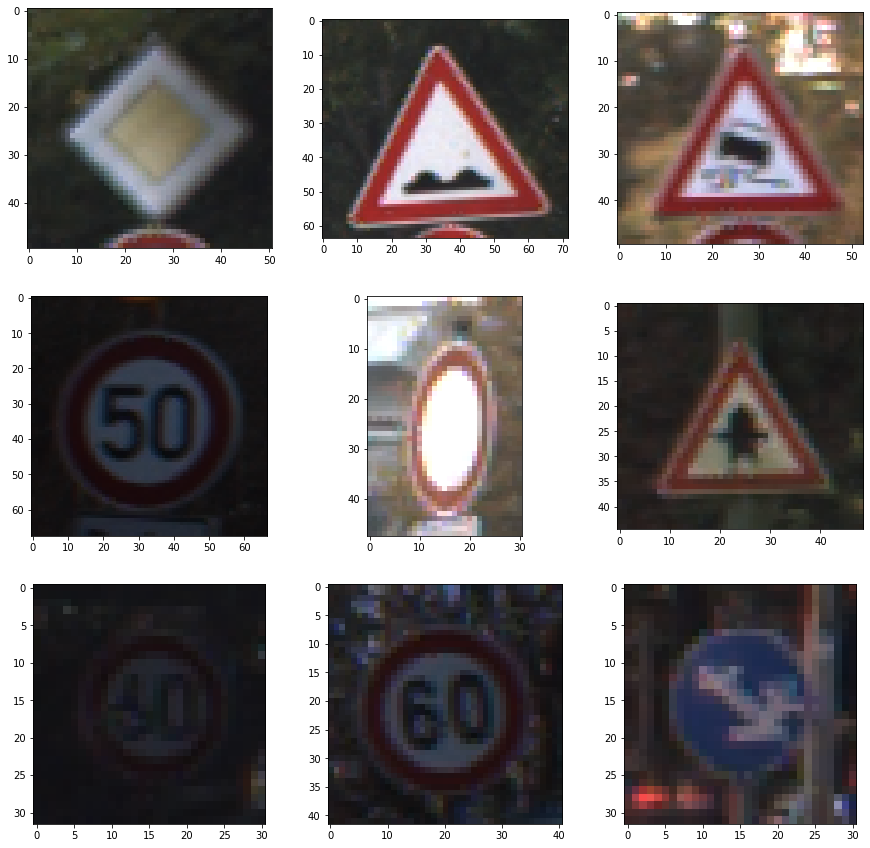

In [6]:
# Visualize random image form test data
import random 

test = pd.read_csv(data_dir+'/Test.csv')
test.head()
imgs = test['Path'].values

plt.figure(figsize=(15,15))

for i in range(1, 10):
    plt.subplot(3,3,i)
    random_image_path = data_dir + '/' +random.choice(imgs)
    random_image = cv2.imread(random_image_path)
    plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))

In [7]:
# Reading input data
image_data = []
image_labels = []

for i in range(num_categories):
    path = data_dir + '/Train/{0}/'.format(i)
    #print(path)
    images = os.listdir(path)
    #print(images)
    for img in images:
        try:
            image = cv2.imread(path+img)
            image_from_array = Image.fromarray(image, 'RGB')
            resize_image = image_from_array.resize((Image_height, Image_width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except AttributeError:
            print('Error occured in '+img)

In [8]:
# Convert the list into numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

In [ ]:
#Reading input images and putting into numpy array
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes):
    path='./data/GTSRB/train/{0}/'.format(i)
    #print(path)
    Class = os.listdir(path)
    for img in Class:
        try:
            image = cv2.imread(path+img)
            image_from_array = Image.fromarray(image, 'RGB')
            resized_image = image_from_array.resize((height, width))
            data.append(np.array(resized_image))
            labels.append(i)
        except AttributeError:
            pass

Cells = np.array(data)
labels = np.array(labels)

In [9]:
# Shuffling the training data
s = np.arange(image_data.shape[0])
image_data.shape
np.random.seed(43)
np.random.shuffle(s)
image_data = image_data[s]
image_labels = image_labels[s]

In [ ]:
# Randomize the order of the input images
s = np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells = Cells[s]
labels = labels[s]

In [10]:
# Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, 
                                                  test_size=0.2, random_state=43, 
                                                  shuffle=True)

X_train = X_train/255
X_val = X_val/255

print('X_train shape: ',X_train.shape)
print('X_val shape: ',X_val.shape)
print('y_train shape: ',y_train.shape)
print('y_val shape: ',y_val.shape)

X_train shape:  (31367, 30, 30, 3)
X_val shape:  (7842, 30, 30, 3)
y_train shape:  (31367,)
y_val shape:  (7842,)


In [11]:
# One hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_categories)
y_val = to_categorical(y_val, num_categories)

print('y_train shape: ',y_train.shape)
print('y_val shape: ',y_val.shape)

y_train shape:  (31367, 43)
y_val shape:  (7842, 43)


In [ ]:
# Spliting the images into train and validation sets
(X_train, X_val) = Cells[(int)(0.2*len(labels)):], Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
(y_train, y_val) = labels[(int)(0.2*len(labels)):], labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [12]:
# Define DNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [13]:
# Compile the model
epochs = 30

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [16]:
# Augmenting the data 
image_data_gen = ImageDataGenerator(rotation_range=10,
                        zoom_range=0.15,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.15,
                        horizontal_flip=False,
                        vertical_flip=False,
                        fill_mode='nearest')

In [17]:
# Training the model
history = model.fit(image_data_gen.flow(X_train, y_train, batch_size=32), 
                    epochs=epochs, 
                    validation_data=(X_val, y_val))

Epoch 1/30
981/981 [==============================] - 37s 37ms/step - loss: 0.5571 - accuracy: 0.8356 - val_loss: 0.0456 - val_accuracy: 0.9864
Epoch 2/30
981/981 [==============================] - 40s 41ms/step - loss: 0.2134 - accuracy: 0.9339 - val_loss: 0.0333 - val_accuracy: 0.9906
Epoch 3/30
981/981 [==============================] - 39s 40ms/step - loss: 0.1600 - accuracy: 0.9493 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch 4/30
981/981 [==============================] - 40s 41ms/step - loss: 0.1233 - accuracy: 0.9622 - val_loss: 0.0097 - val_accuracy: 0.9971
Epoch 5/30
981/981 [==============================] - 40s 41ms/step - loss: 0.1153 - accuracy: 0.9638 - val_loss: 0.0116 - val_accuracy: 0.9963
Epoch 6/30
981/981 [==============================] - 41s 42ms/step - loss: 0.1016 - accuracy: 0.9680 - val_loss: 0.0107 - val_accuracy: 0.9972
Epoch 7/30
981/981 [==============================] - 42s 42ms/step - loss: 0.0860 - accuracy: 0.9743 - val_loss: 0.0458 - val_accuracy:

In [18]:
model.save('./model/GTSRB-2-30epochs.h5')

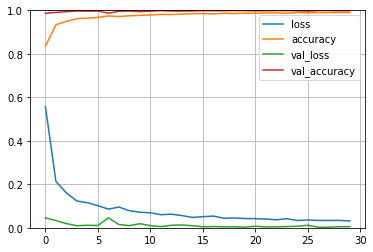

In [25]:
# Evaluate the model
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
# Perform test

test = pd.read_csv(data_dir + '/Test.csv')
test
labels = test['ClassId'].values
imgs = test['Path'].values

data = []

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_image = image_from_array.resize((Image_height, Image_width))
        data.append(np.array(resize_image))
    except AttributeError:
        print('Error occured in '+ img)

X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

/home/soaib/anaconda3/envs/cvml/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
print('Test Data Accuracy: ', accuracy_score(labels, pred)*100)

Test Data Accuracy:  98.37688044338876


In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

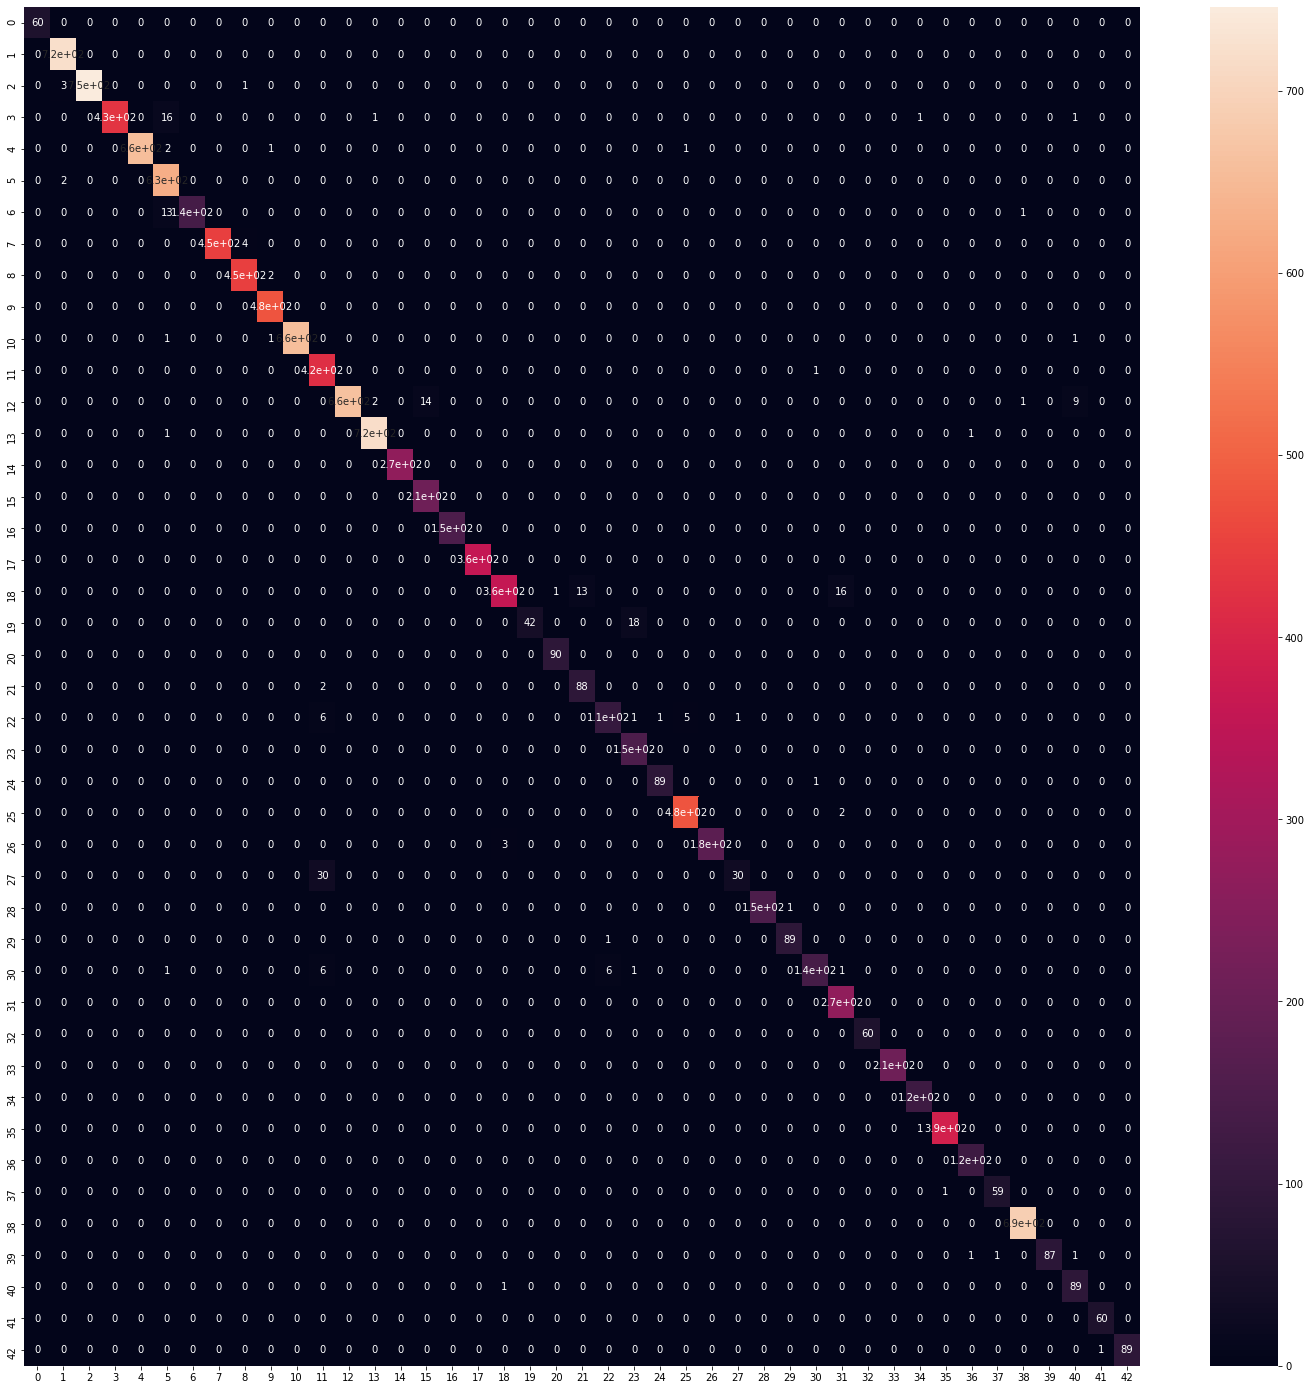

In [46]:
import seaborn as sns
cf_df = pd.DataFrame(cf, index=classes, columns=classes)
cf_df
plt.figure(figsize=(25,25))
sns.heatmap(cf_df, annot=True)

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       1.00      0.99      1.00       750
           3       1.00      0.96      0.98       450
           4       1.00      0.99      1.00       660
           5       0.95      1.00      0.97       630
           6       1.00      0.91      0.95       150
           7       1.00      0.99      1.00       450
           8       0.99      1.00      0.99       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.90      1.00      0.95       420
          12       1.00      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

Dataset: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign